# Segunda Parte

### **Configurar los módulos para empezar con el análisis**

### Herramientas a utilizar

1. Pandas
2. pyplot


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from numpy import unique

plt.style.use('ggplot')

covidRecords = None
try:
	covidRecords = pd.read_csv("COVID_USA_REFINED.csv", sep = ',')
except:
	print("No se encontro el archivo")


### Muestra de lo que contiene el dataset

In [2]:
covidRecords.head(5) # Se enseña una muestra de los primeros 5 datos del dataset

,UID,iso2,iso3,FIPS,Admin2,Province_State,Lat,Long_,Combined_Key,Date,Confirmed,Deaths
0,16,AS,ASM,60.0,American Samoa,American Samoa,-14.271000,-170.132000,"American Samoa, US",2020-01-22T00:00:00Z,0,0
1,316,GU,GUM,66.0,Guam,Guam,13.444300,144.793700,"Guam, US",2020-01-22T00:00:00Z,0,0
2,580,MP,MNP,69.0,Northern Mariana Islands,Northern Mariana Islands,15.097900,145.673900,"Northern Mariana Islands, US",2020-01-22T00:00:00Z,0,0
3,63072001,PR,PRI,72001.0,Adjuntas,Puerto Rico,18.180117,-66.754367,"Adjuntas, Puerto Rico, US",2020-01-22T00:00:00Z,0,0
4,63072003,PR,PRI,72003.0,Aguada,Puerto Rico,18.360255,-67.175131,"Aguada, Puerto Rico, US",2020-01-22T00:00:00Z,0,0


## Técnicas EDA

### Estadística Descriptiva

Mediante los comando de Pandas podemos obtener una descripción básica de que como es que se encuentran nuestras variables o atributos.

In [7]:
covidRecords.describe()

,UID,FIPS,Lat,Long_,Confirmed,Deaths
count,6.279200e+05,626040.000000,627920.000000,627920.000000,627920.000000,627920.000000
mean,8.342958e+07,33061.684685,36.707212,-88.601474,357.284285,17.536328
std,4.314702e+06,18636.156825,9.061572,21.715747,3487.282694,300.991466
min,1.600000e+01,60.000000,-14.271000,-174.159600,0.000000,0.000000
25%,8.401811e+07,19079.000000,33.895587,-97.790204,0.000000,0.000000
50%,8.402921e+07,31014.000000,38.002344,-89.486710,4.000000,0.000000
75%,8.404612e+07,47131.000000,41.573069,-82.311265,63.000000,1.000000
max,8.410000e+07,99999.000000,69.314792,145.673900,224051.000000,23500.000000


Podemos ver información importante como los promedios y valores estándar. En este punto, podemos determinar si los datos se encuentran normalizados, es decir, se encuentran valores similares entre ellos, o bien, si existe la posibilidad de encontrar outliers dentro de estos.

### Correlación

Mediante la función de Pandas `corr()` se pudo determinar que existe una base estadística que refuerza la conjetura lógica de que existe una relación entre la cantidad de casos confirmados y la cantidad de muertos

In [8]:
covidRecords.corr()

,UID,FIPS,Lat,Long_,Confirmed,Deaths
UID,1.000000,-0.198912,0.314965,-0.235989,0.012601,0.007961
FIPS,-0.198912,1.000000,-0.453129,0.483018,-0.026350,-0.010410
Lat,0.314965,-0.453129,1.000000,-0.721129,0.010885,0.013868
Long_,-0.235989,0.483018,-0.721129,1.000000,0.013257,0.021035
Confirmed,0.012601,-0.026350,0.010885,0.013257,1.000000,0.898629
Deaths,0.007961,-0.010410,0.013868,0.021035,0.898629,1.000000


En la tabla mostrada se puede observar como estos dos atrbutos, `Confirmed` y `Deaths`, son los únicos dos que tienen un alto grado de relación, siendo el más alto 1. A partir de esto podemos generar un gráfico para realizar un análisis más a profundidad.

### Visualización

<AxesSubplot:xlabel='Date', ylabel='Confirmed'>

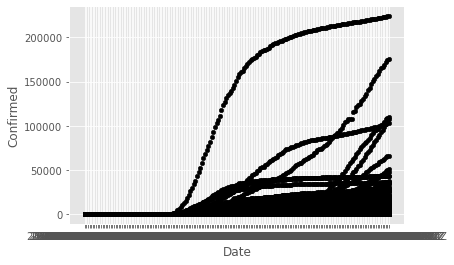

In [16]:
covidRecords.plot(x = "Date", y = "Confirmed", kind= "scatter", color = "black")

Por medio de la visualización de datos podemos encontrar anomalías en los datos, así como tener una idea de que tan dispersos están en relación de otros atributos y como se comportan a la hora de ser contrastados

## Creación de Gráficas

### Gráfica de Correlación entre los casos Confirmados y las Muertes

<AxesSubplot:xlabel='Deaths', ylabel='Confirmed'>

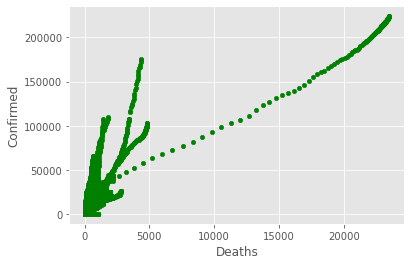

In [4]:
covidRecords.plot(x = "Deaths", y = "Confirmed", kind = 'scatter', color = "green")

Como se puede observar el en gráfico, hubo un cierto grado de similitud entre los casos confirmados y las muertes registradas. El análisis de la gráfica nos permite llegar a la hipótesis de que en un principio es probable que solo se estuvieran danto contagios como mayoría, mientras que con el paso del tiempo, estos contagios iban a significar fatalidades. Por eso, al dispararse la tasa de contagio y junto con otros factores como la letalidad de las variantes, es que se tiene un comportamiento similar en el atributo de muertes.

### Gráfica de cantidad de muertes en la línea del tiempo

<AxesSubplot:xlabel='Date'>

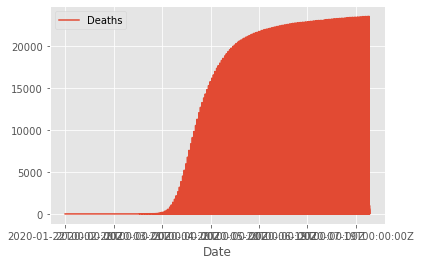

In [5]:
covidRecords.plot(x = "Date", y = "Deaths", kind="line")

Al analizar este gráfico podemos ver como fue creciendo la curva de muertes a lo largo del tiempo. Este conjunto de datos solo muestra hasta junio de ese año, básicamente uno de los momentos más duros de la pandemia para Estados Unidos.

## Atributos de poco valor

### Mostramos cuales son las características de los atributos

In [6]:
print(covidRecords.nunique())

UID                3340
iso2                  6
iso3                  6
FIPS               3330
Admin2             1984
Province_State       58
Lat                3226
Long_              3226
Combined_Key       3340
Date                188
Confirmed         11091
Deaths             2011
dtype: int64


### Análisis de los atributos

1. Como se puede observar por medio del uso de la función `nunique` de numpy, se llega a la conclusión de que los atributos `iso2` e `iso3` no aportan mucho al set de datos

2. La columna `FIPS` a pesar de poseer gran cantidad de valores únicos, estos no aportan información para el análisis, ya que es utilizada como una forma de identificación, pero esta función ya es cubierta por el atributo `UID`